In [1]:
#librerias
import numpy as np
import time
from datetime import datetime
#from loaddata import *

#sklearn
from sklearn.model_selection import ShuffleSplit, cross_val_score, cross_val_predict
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics as met
import joblib

#mne
import mne
from mne.decoding import CSP
from mne.channels import read_layout
from mne.channels import make_standard_montage
from mne.preprocessing import (create_eog_epochs, create_ecg_epochs,
                               compute_proj_ecg, compute_proj_eog)

In [2]:
#path="DATA/Experiment_2/Models/"
epochs=mne.read_epochs("Experiment-epo.fif", proj=True, preload=True, verbose=None)
#Se carga target (convierte 1 -> -1 y 2 -> 0 )
#target = epochs.events[:, -1] - 2
target = epochs.events[:, -1]
#print(epochs.events[:, -1])
print(target)

Reading /home/nahuel/Documents/TESIS/02 - Experimental/Examples/Jupyter/TT/Experiment-epo.fif ...
    Found the data of interest:
        t =     500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
208 matching events found
No baseline correction applied
0 projection items activated
[0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 0 0 1
 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 1 0 1 1
 1 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 1 1 0 1 0 0 1 0 0 0 1 1 1 1 1 1 0 1 0 1
 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 1 1 0
 0 0 1 1 0 0 1 1 0 1 0 0 1 1 1 0 0 1 1 0 1 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1
 1 0 1 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 1 1 1 1 0]


In [3]:
e0= epochs[epochs.events[:,2]==0]
e1= epochs[epochs.events[:,2]==1]

In [4]:
e1
#event_pause=events_from_file[events_from_file[:,2]==0]
#event_right=events_from_file[events_from_file[:,2]==1]

<EpochsFIF |  103 events (all good), 0.5 - 1.5 sec, baseline off, ~1.6 MB, data loaded,
 'right': 103>

In [5]:
e0.load_data()  # Resampling to save memory.
e0.resample(250, npad='auto')
e1.load_data()  # Resampling to save memory.
e1.resample(250, npad='auto')
evoked_pause = e0.average()
evoked_right = e1.average()

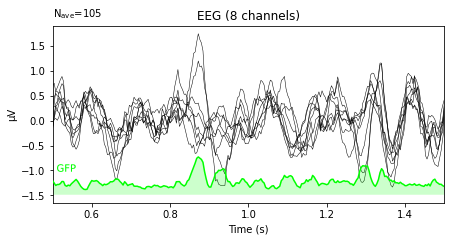

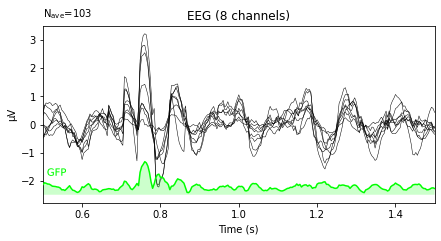

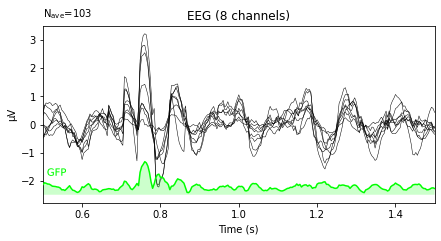

In [13]:
#dict(mag=1e-12, grad=4e-11, eeg=20e-6, eog=150e-6, ecg=5e-4, emg=1e-3, ref_meg=1e-12, misc=1e-3, stim=1, resp=1, chpi=1e-4, whitened=1e2)
evoked_pause.plot(window_title='Standard', gfp=True, time_unit='s', scalings=None)
evoked_right.plot(window_title='Standard', gfp=True, time_unit='s', scalings=None)

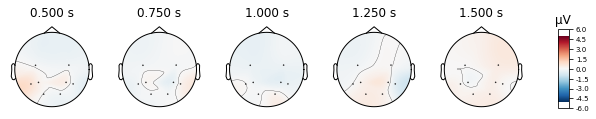

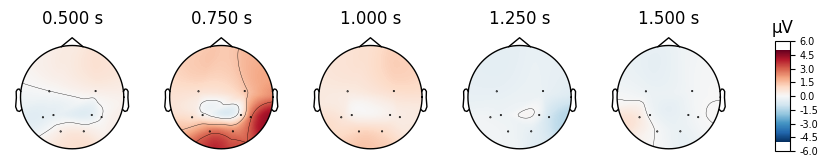

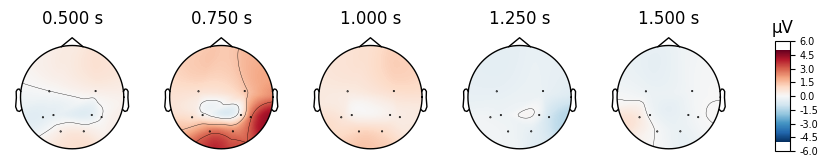

In [6]:
evoked_pause.plot_topomap(times=[0.5, 0.75, 1, 1.25, 1.5], ch_type='eeg', vmin=-5, vmax=5)
evoked_right.plot_topomap(times=[0.5, 0.75, 1, 1.25, 1.5], ch_type='eeg', vmin=-5, vmax=5)